# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

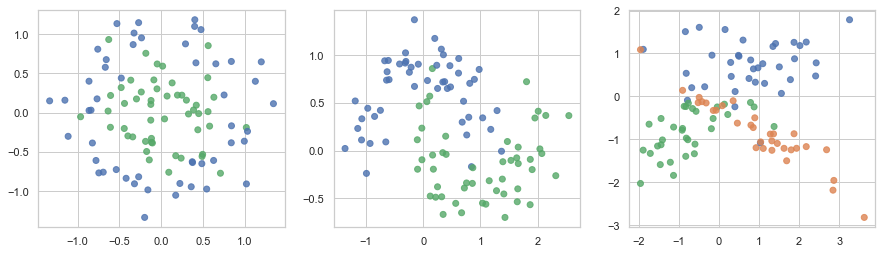

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, ax=None):
    if ax is None:
        ax = plt.gca()
        
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

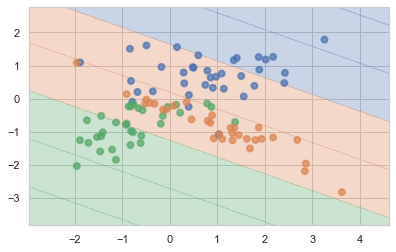

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

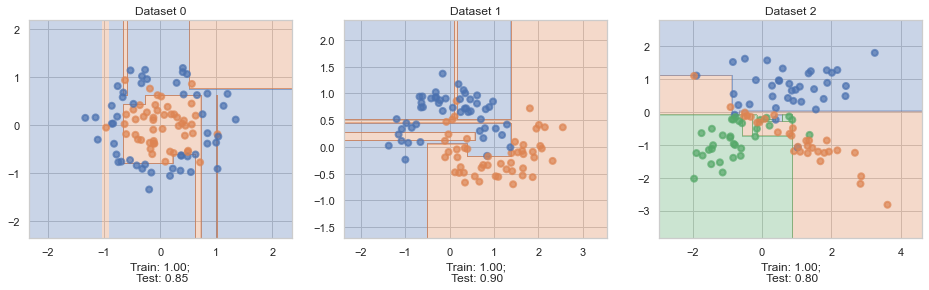

In [7]:
from sklearn.metrics import accuracy_score

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    tree = DecisionTreeClassifier(random_state=10)
    tree.fit(X_train, y_train)
    plot_surface(tree, X, y, ax=axes[i])
    axes[i].set_title('Dataset %i' % i)
    
    y_tr = tree.predict(X_train)
    y_te = tree.predict(X_test)
    acc_tr = accuracy_score(y_train, y_tr)
    acc_te = accuracy_score(y_test, y_te)
    axes[i].set_xlabel('Train: %.2f;\n Test: %.2f' % (acc_tr, acc_te))
    
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plt.show()

__Ответ:__ так как мы никак не ограничивали деревья, мы переобучились, достигнув нулевой ошибки на всех наборах данных. Это видно и по картинке - заметны странные области (справа вверху в `Dataset 0`) и тонкие полосы. При всем этом, переобучились мы не очень сильно, но я думаю, что с более сложными данными эффект был бы более ярким.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
cv = KFold(shuffle=True, random_state=10)

params = { 'max_features': ['log2', 'sqrt'],
           'max_depth': [4, 8, 14, 22],
           'min_samples_leaf': [2, 6, 12, 18]
         }

searcher = GridSearchCV(DecisionTreeClassifier(random_state=10),
                  param_grid=params,
                  cv=cv,
                  scoring='accuracy')
searcher.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [4, 8, 14, 22],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 6, 12, 18]},
             scoring='accuracy')

In [9]:
cv_df = pd.DataFrame(searcher.cv_results_['params'])
cv_df['mean_test_score'] = searcher.cv_results_['mean_test_score']
cv_df.head()

,max_depth,max_features,min_samples_leaf,mean_test_score
0,4,log2,2,0.80
1,4,log2,6,0.80
2,4,log2,12,0.84
3,4,log2,18,0.84
4,4,sqrt,2,0.80


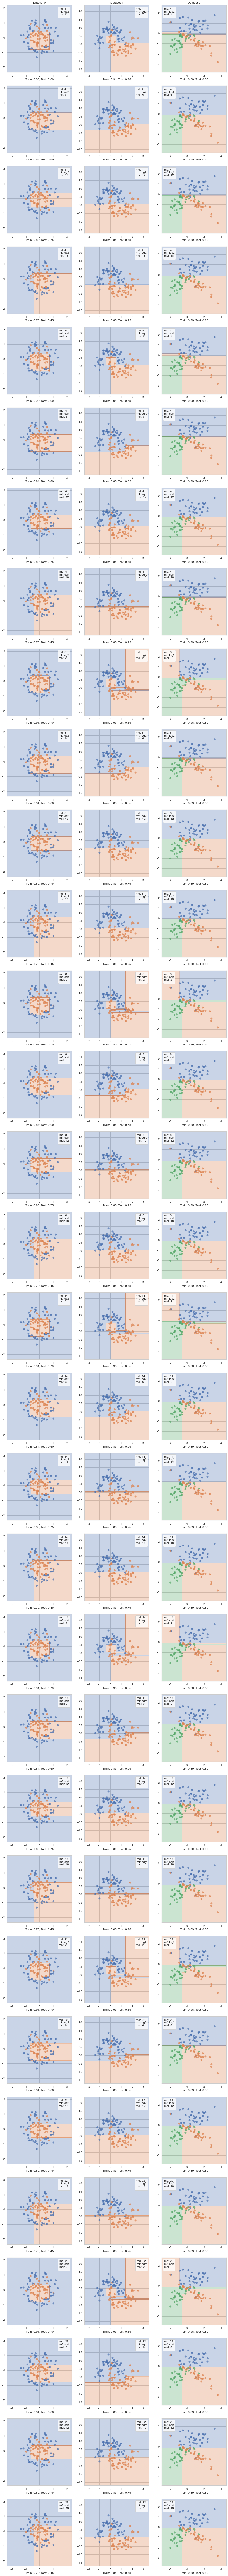

In [10]:
from IPython.display import clear_output

m = cv_df.shape[0]
fig, axes = plt.subplots(ncols=3, nrows=m, figsize=(16, 6 * m))
for j, row in cv_df.iterrows():
    
    for i, (X, y) in enumerate(datasets):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
        tree = DecisionTreeClassifier(max_depth=row['max_depth'],
                                      max_features=row['max_features'],
                                      min_samples_leaf=row['min_samples_leaf'],
                                      random_state=10)
        tree.fit(X_train, y_train)
        plot_surface(tree, X, y, ax=axes[j, i])
        axes[j, i].set_title('Dataset %i' % i) if j == 0 else _

        y_tr = tree.predict(X_train)
        y_te = tree.predict(X_test)
        acc_tr = accuracy_score(y_train, y_tr)
        acc_te = accuracy_score(y_test, y_te)
        axes[j, i].set_xlabel('Train: %.2f; Test: %.2f' % (acc_tr, acc_te))
        axes[j, i].legend(title='md: %i\nmf: %s\nmsl: %i' % 
                          (row['max_depth'], row['max_features'], row['min_samples_leaf']))
        clear_output(wait=True)
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plt.show()

__Ответ:__ при плохо подобранных параметрах можно получить как недообучение, так и переобучение.\
Переобучаемся мы, если `max_depth = 4`, `min_samples_leaf = 2`. Увеличивая последний гиперпараметр, эффект переобучение снижается, обобщающая способность улучшается (как водится, до определенного момента - на первой выборке  `max_depth = 4`, `min_samples_leaf = 18` - видим сильное переобучение). Этот эффект не меняется для различного значения `max_features`, но я полагаю, что это зависит от конкретной выборки.\
Далее мы увеличиваем `max_depth` с 4 до 8, и сразу же ловим переобучение. Увеличиваем `min_samples_leaf` и сглаживаем эффект (опять же, существует критеческое значение, при котором все снова становится плохо - 18). При других значениях картина меняется несильно. Кроме того, влияния значения `max_features` я так и не заметил.\
Итог: можно подобрать значение `max_depth` впритык к моменту начала переобучения. Затем можно подобрать `min_samples_leaf`, чтобы сгладить модель и уже только потом чуть поднять `max_depth` в попытке достить лучшего качества.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [12]:
%load_ext autoreload

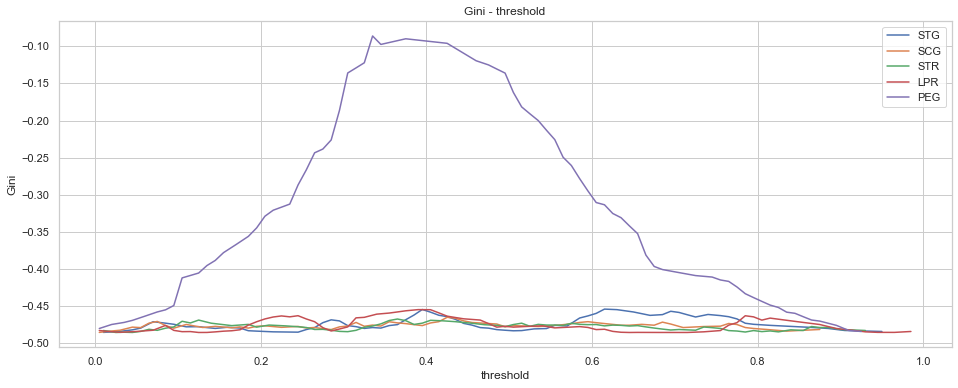

In [13]:
%autoreload 2
from hw5code import find_best_split

features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

plt.figure(figsize=(16, 6))
for feat in features:
    tr, gn, _, _ = find_best_split(df[feat], df[' UNS'])
    plt.plot(tr, gn, label=feat)

plt.legend(shadow=False)
plt.xlabel('threshold')
plt.ylabel('Gini')
plt.title('Gini - threshold')
plt.show()

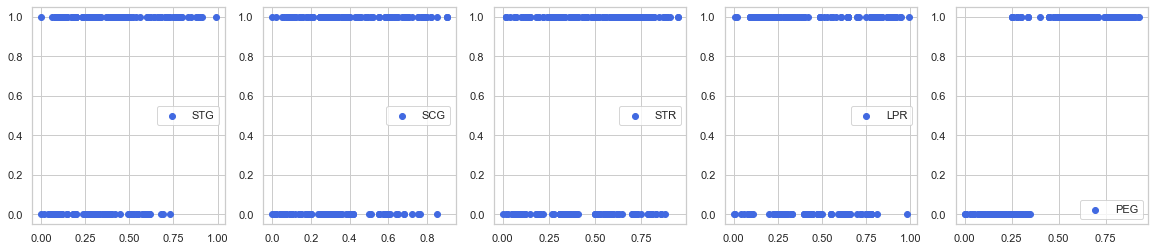

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for i, feat in enumerate(features):
    axes[i].scatter(df[feat], df[' UNS'], label=feat, color='royalblue')
    axes[i].legend()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** по признаку PEG. Во-первых, он явно влияет на значение критерия Джини. Во-вторных, на последнем графике в отличие от всех у PEG наблюдается явное деление классов. Отвечая на вопрос - результат соогласуется. Если признак хороший, то кривая будет показывать сильную динамику изменения критерия Джини. В этом и разница с другими кривыми (для других признаков) - динамика практически отсутствует.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».
 
 *Все изменения указаны в соответствующем файле.*

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

`Label` и `Ordinal` кодировщики выполняют одно и то же (если не вносить какие-то дополнительные параметры в последний), при этом `Label` применяется для целевой переменной. Поэтому я решил использовать `Ordinal`, чтобы не итерироваться по столбцам.

In [15]:
mushrooms_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

mushrooms_df['p'] = (mushrooms_df['p'] == 'e').astype(int)
mushrooms_df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [16]:
from sklearn.preprocessing import OrdinalEncoder
X = OrdinalEncoder().fit_transform(mushrooms_df.drop(columns='p'))
y = mushrooms_df['p'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [17]:
%autoreload 2
from hw5code import DecisionTree
feature_types = ['categorical' for _ in range(X.shape[1] * 10)]
tree = DecisionTree(feature_types).fit(X_train, y_train)
train_predicted = tree.predict(X_train)
test_predicted = tree.predict(X_test)

acc_tr = accuracy_score(y_train, train_predicted)
acc_te = accuracy_score(y_test, test_predicted)
print('Train: %.2f\nTest: %.2f' % (acc_tr, acc_te))

Train: 1.00
Test: 1.00


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [18]:
ttt_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
cars_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
nursery_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

ttt_df['positive'] = (ttt_df['positive'] == 'positive').astype(int)
cars_df['unacc'] = ( (cars_df['unacc'] == 'good') | ((cars_df['unacc'] == 'vgood')) ).astype(int)
nursery_df['recommend'] = ( (nursery_df['recommend'] != 'not_recom') &
                           ((nursery_df['recommend'] != 'recommend')) ).astype(int)

In [19]:
X_m = OrdinalEncoder().fit_transform(mushrooms_df.drop(columns='p'))
y_m = mushrooms_df['p'].to_numpy()

X_t = OrdinalEncoder().fit_transform(ttt_df.drop(columns='positive'))
y_t = ttt_df['positive'].to_numpy()

X_c = OrdinalEncoder().fit_transform(cars_df.drop(columns='unacc'))
y_c = cars_df['unacc'].to_numpy()

X_n = OrdinalEncoder().fit_transform(nursery_df.drop(columns='recommend'))
y_n = nursery_df['recommend'].to_numpy()

datasets = [(X_m, y_m), (X_t, y_t), (X_c, y_c), (X_n, y_n)]

In [32]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from tqdm.notebook import tqdm

sz = max(y_m.shape[0], y_t.shape[0], y_c.shape[0], y_n.shape[0])

trees = [
    DecisionTree(['real' for _ in range(sz)]),
    DecisionTree(['categorical' for _ in range(sz)]),
    Pipeline([
        ('encoder', OneHotEncoder(sparse=False)),
        ('model', DecisionTree(['real' for _ in range(sz)]))
    ]),
    DecisionTreeClassifier()
]

data = {}
for i, tree in tqdm(enumerate(trees)):
    scores = []
    for (X, y) in datasets:
        scores.append(np.mean(cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score))))
    data[str(i)] = scores
        
results = pd.DataFrame(index=['mushrooms', 'tic-tac-toe', 'cars', 'nursery'], data=data)
results.rename(columns={'0': 'real', '1': 'cat', '2': 'real_ohe', '3': 'lib'}, inplace=True)
results.head()

,real,cat,real_ohe,lib
mushrooms,0.999261,1.000000,0.999631,0.961984
tic-tac-toe,0.462697,0.549265,0.553520,0.783991
cars,0.942600,0.967519,0.921767,0.944952
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

Если запустить предыдущую ячейку несколько раз, то станет заметно, что компонента случайность есть только у библиотечной реализации дерева решений. Однако я не думаю, что на нее можно каким-то образом повлиять, хоть это было бы неплохо (в некоторых случаях заметно влияет на решение в размере 1-3%). Но есть слабое предположение, что явная случайность возникает из-за неинициализированных гиперпараметров. Возможно, если мы как-то их подберем, это поможет снизить стохастический характер результатов.

Касаемо ответа на первый вопрос. Нельзя сказать, что какой-то алгоритм лучше в целом. К примеру, библиотечный алгоритм показал себя на `tic-tac-toe` лучше всех других, но при этом алгоритм, считающий все признаки категориальными оказался лучше других на остальных выборках. Остальные два чуть хуже его, но сравнимы для `mushrooms` и `nursery`. С `cars`, как по мне, различие существенное (порядка 4% разрыв). 

Также я заметил (уже под конец выполнения дз), что выборка `tic-tac-toe` отсортирована по возрастанию целевой переменной. Это нехорошо, и, разумеется, выборку надо перемещивать. Суть проблемы в том, что у нас сначала идут чередом положительные классы, затем отрицательные. Это означает, что в кросс-валидации может не попасть один класс. Альтернативой шаффлингу может быть `StratifiedFold`, так как она учитывает долю каждого класса. Попробую пофиксить данное недоразумение.

In [33]:
from sklearn.model_selection import StratifiedKFold

trees = [
    DecisionTree(['real' for _ in range(sz)]),
    DecisionTree(['categorical' for _ in range(sz)]),
    Pipeline([
        ('encoder', OneHotEncoder(sparse=False)),
        ('model', DecisionTree(['real' for _ in range(sz)]))
    ]),
    DecisionTreeClassifier()
]

data = {}
KF = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
for i, tree in tqdm(enumerate(trees)):
    scores = []
    for (X, y) in datasets:
        scores.append(np.mean(cross_val_score(tree, X, y, cv=KF, scoring=make_scorer(accuracy_score))))
    data[str(i)] = scores
        
results = pd.DataFrame(index=['mushrooms', 'tic-tac-toe', 'cars', 'nursery'], data=data)
results.rename(columns={'0': 'real', '1': 'cat', '2': 'real_ohe', '3': 'lib'}, inplace=True)
results.head()

,real,cat,real_ohe,lib
mushrooms,1.000000,1.000000,1.000000,1.000000
tic-tac-toe,0.881864,0.946700,0.942533,0.877664
cars,0.993635,0.994213,0.988994,0.992475
nursery,0.999691,0.999768,0.999768,0.999691


Как и ожидалось - совсем другое дело. Однако по-прежнему результаты на `tic-tac-toe` ниже, чем на других, что, на мой взгляд, обеспечено особенностями выборки. А еще меня удивляет 100% верных ответов на `mushrooms`. К слову, с другими выборками мы также вышли в плюс.